# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

Your answer here.

An error will be returned because lam must be greater than zero, if it dont it will be mathematically incorrect.

In [2]:
def poissonNegLogLikelihood(lam,y):
    
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_log_lik = -sum(y*np.log(lam)-lam)
    return neg_log_lik

lam = 1.3
y=np.array([2,1,0,0])
print(poissonNegLogLikelihood(lam,y))
lam=np.array([1,0.5,1,3])
y=np.array([2,1,0,0])
poissonNegLogLikelihood(lam,y)

4.412907206597527


6.193147180559945

---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [3]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
poissonRegressionNegLogLikelihood(b, X, y)

3211.7843052468816

### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) An exponential function can make the original likelihood value to be non-negative and much "readable" than the original one, because original likelihood value can be very small and then omitted by the program while exponential likelihood is always more meaningful and readable.

b) First,the lambda could be a negative value and mess up the likelihood function, then, the lambda could be very small and omitted by the program.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [4]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
modelPrediction(b,X)

array([ 148.4131591 , 2980.95798704,  148.4131591 ])

### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [5]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows,ncols = X.shape
    beta_start = np.zeros((ncols,1))
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood,beta_start,args=(X,y),method = "Powell",tol = 1e-8)
    print(mle)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
fitModel(X,y)

   direc: array([[ 1.43486724e-01, -1.70395632e-01],
       [ 6.16676704e-05, -3.22328770e-04]])
     fun: -11.385182045207953
 message: 'Optimization terminated successfully.'
    nfev: 232
     nit: 5
  status: 0
 success: True
       x: array([ 0.94827555, -0.52953518])


array([ 0.94827555, -0.52953518])

### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

   direc: array([[ 0.        ,  1.        ],
       [-0.2005827 ,  0.12488441]])
     fun: 28.287152434220943
 message: 'Optimization terminated successfully.'
    nfev: 156
     nit: 4
  status: 0
 success: True
       x: array([-0.15170358,  1.23878459])


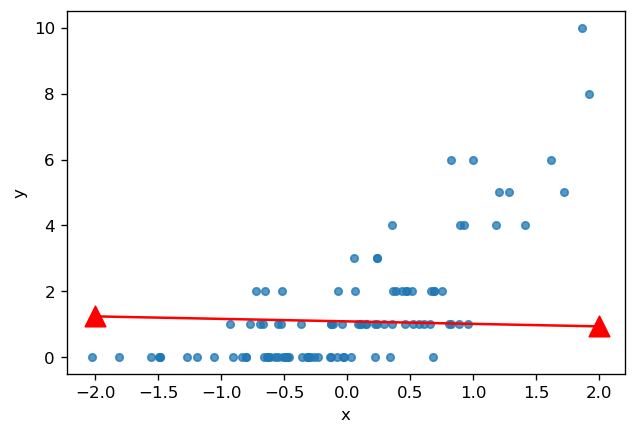

In [6]:
# Loading in the data.  
df = pd.read_csv('~/Desktop/CS4414/A2/poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
df.plot.scatter(x='x', y='y',alpha = 0.75, ax = ax);
# Fit the model.  Use your functions.  
x = df.x.values 
X = np.c_[np.ones(x.size), x]
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
# newX = 

# Make predictions on the new data
y_predicted= modelPrediction(betas,X)

#Finally, plot the predictions on the same axis and color the predictions red
slope = -0.15170358
# A line with a fixed slope can intercept the axis
x_0 = -2
y_0 = 1.23878459
x_1 = 2
y_1 = 2*slope + y_0
plt.scatter([x_0, x_1], [y_0, y_1], marker='^', s=150, c='r')
plt.plot([x_0, x_1], [y_0, y_1], c='r') 

### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


OLS rsquared:  0.52


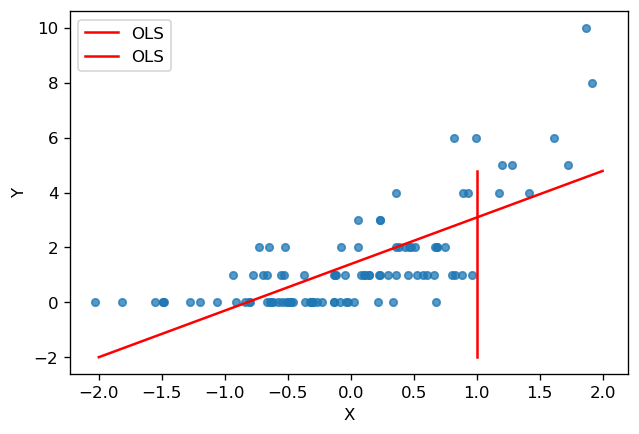

In [7]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.read_csv('~/Desktop/CS4414/A2/poisson_regression_data.csv')
x = df.x.values 
X = np.c_[np.ones(x.size), x]
y= df.y.values
ols_fit = linear_model.LinearRegression().fit(X, y)

print('OLS rsquared: ', ols_fit.score(X,y).round(2))

# Make predictions over the range -2 to 2
new_x = np.linspace(-2,2,1001)
new_X = np.c_[np.ones(new_x.size), new_x]
y_ols = ols_fit.predict(new_X)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'x', y ='y', ax = ax, alpha = 0.75)
ax.plot(new_X, y_ols, color = 'red', label = 'OLS')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

The problem for linear regression is that it only observes a linear relationship between y and x, which is incorrect sometimes, in real world, the relationships can not be simply described by a straight line, they often requires more complex methodologies.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.